In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

import pymc3 as pm
import arviz as az

from sklearn.metrics import mean_squared_error


# Get Data

In [2]:
dataframe = pd.read_csv("C:/Users/Luke/OneDrive/Research/sg_data/sg_hole_train.csv")


measure_var = 'SG_drive'



In [3]:
P = len(np.unique(dataframe['p_idx']))
#P_Y = len(np.unique(dataframe['p_y_idx']))
C = len(np.unique(dataframe['c_idx']))


# NODSR

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [course_dsr, course, sigma_course, mu_course, plyr, sigma_plyr, mu_plyr]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 893 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC5045B188>,
      dtype=object)

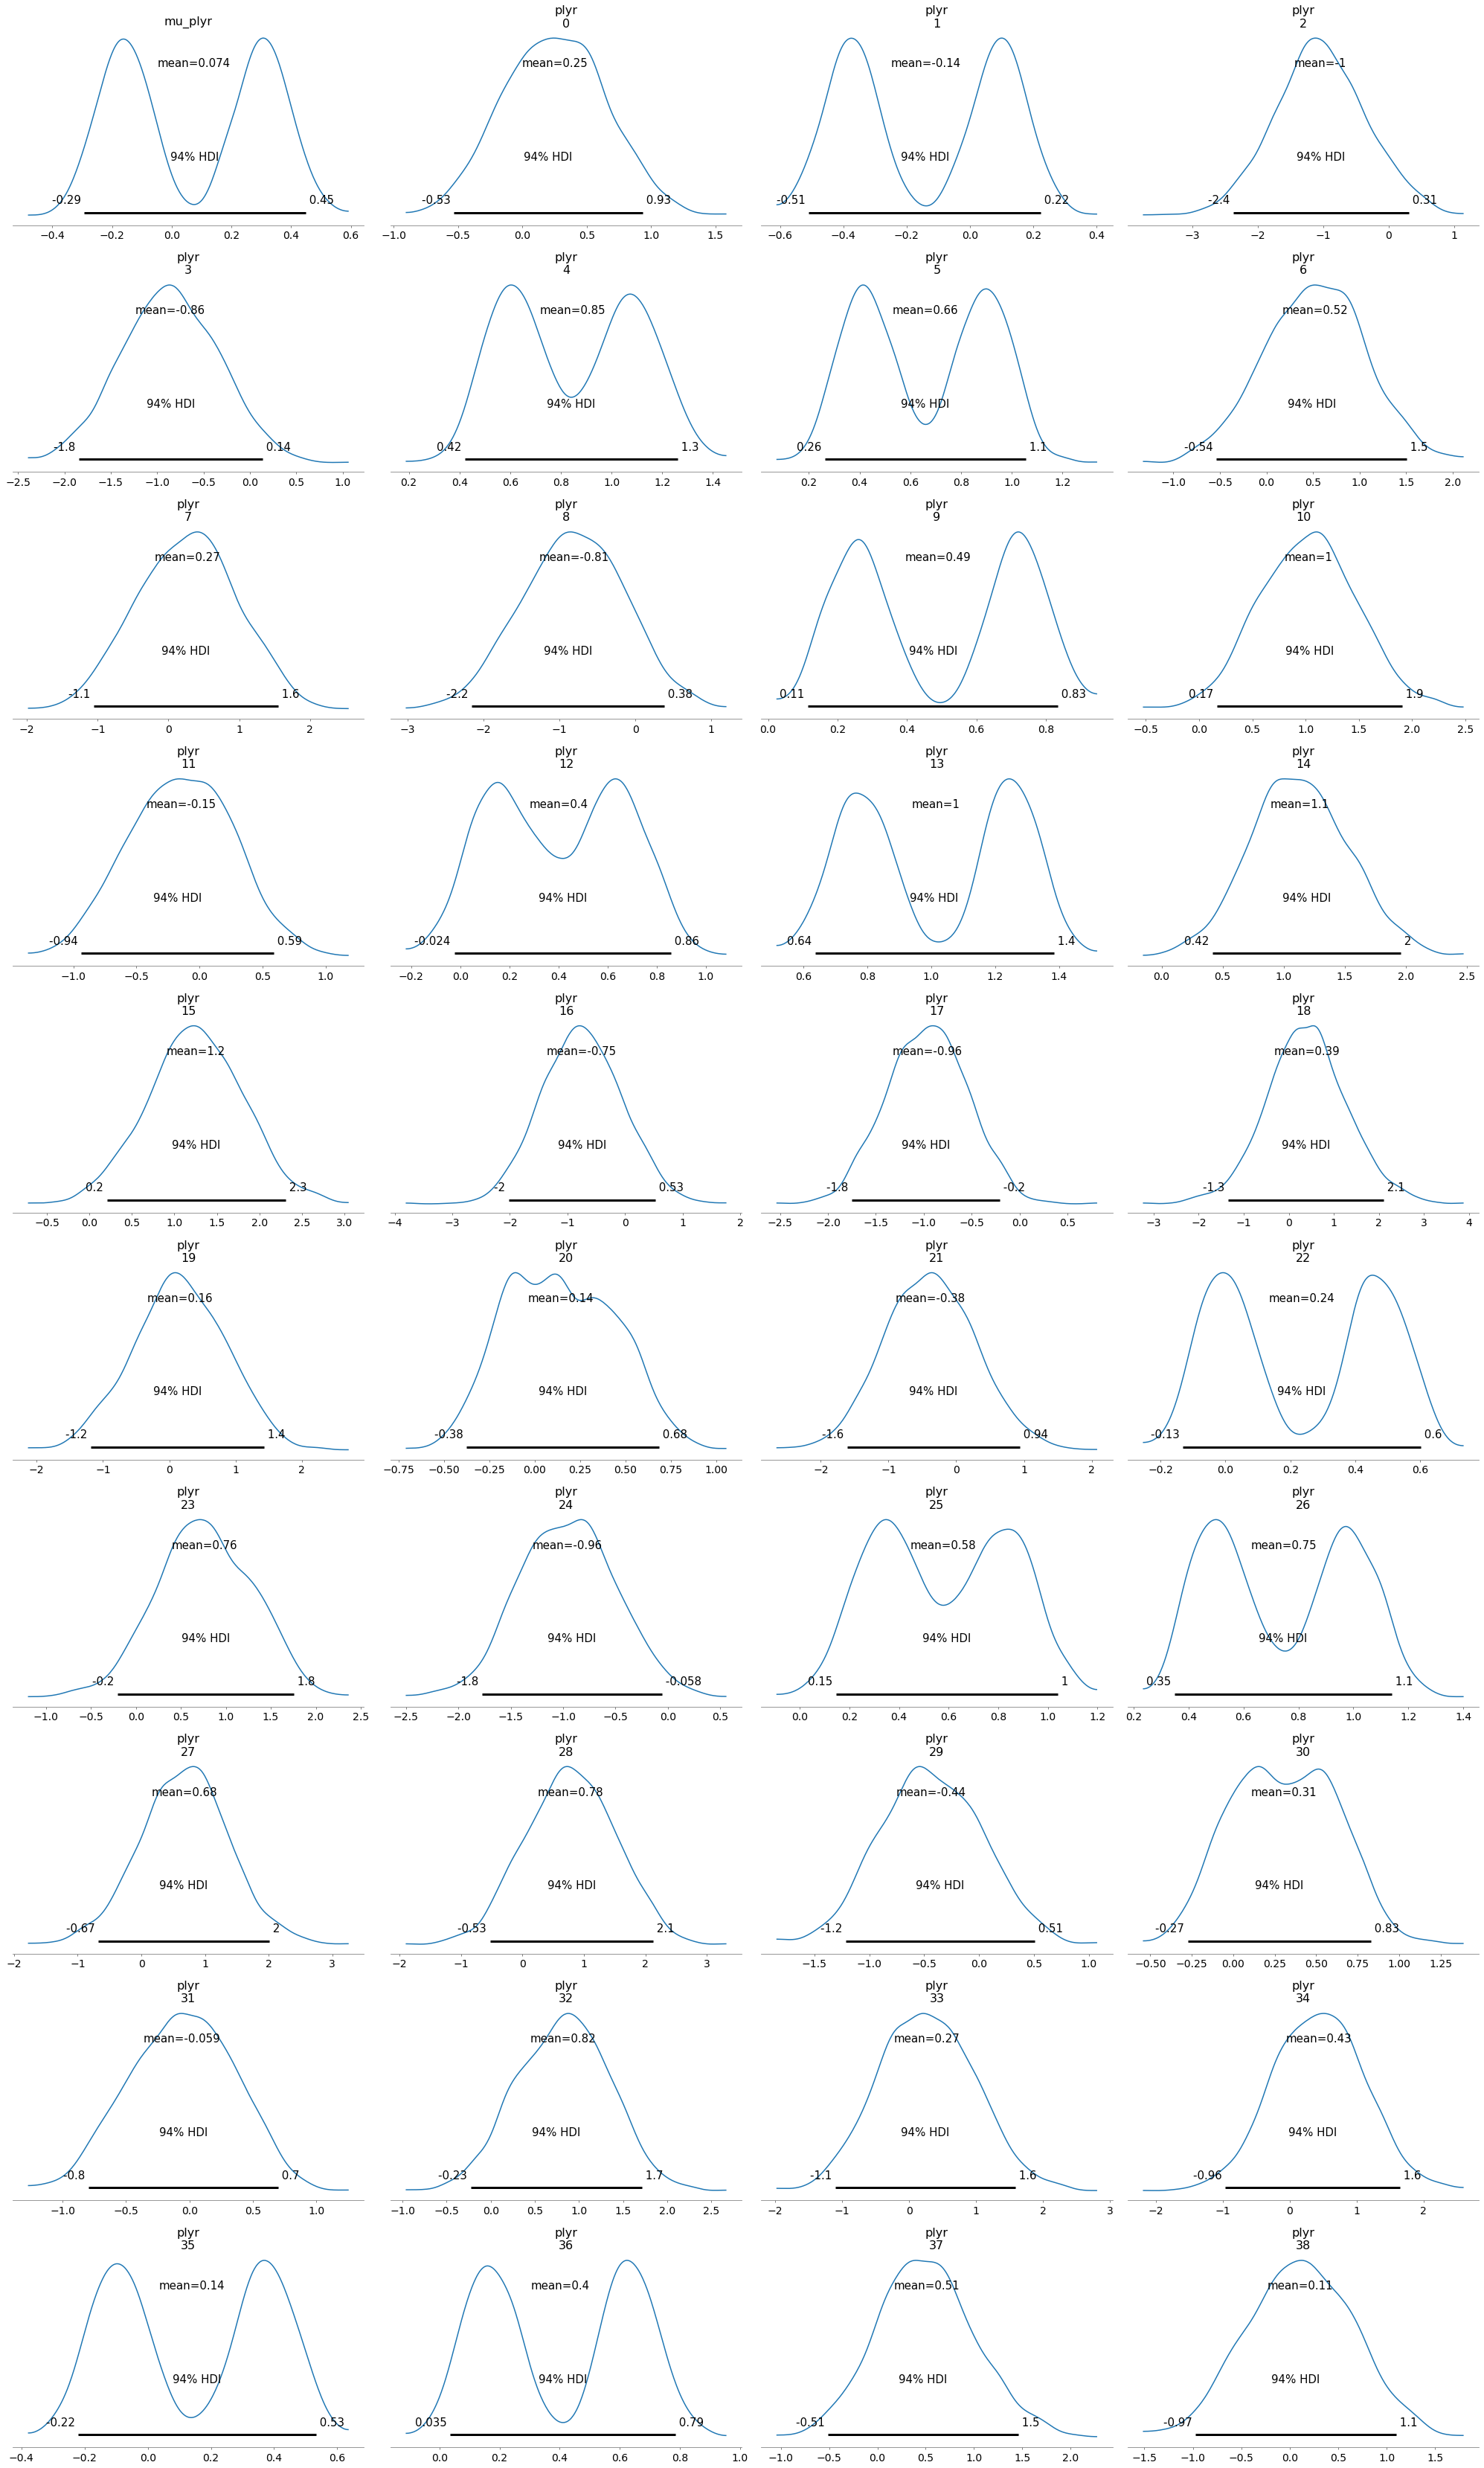

In [4]:

with pm.Model() as hierarchical_model:
    mu_plyr = pm.Normal('mu_plyr', 0.00, 1.0)
    sigma_plyr  = pm.Gamma('sigma_plyr',3.0,2.5)
    plyr = pm.Normal('plyr', mu_plyr,2, shape = P )
    
    mu_course = pm.Normal('mu_course', 0.0, 1.0)
    sigma_course  = pm.Gamma('sigma_course',3.0,1.5)
    course = pm.Normal('course', mu_course,2, shape = C )
    
    #mu_course_dsr = pm.Normal('mu_course_dsr', 1.0, 0.0001)
    #sigma_course_dsr  = pm.Gamma('sigma_course_dsr',1,2)
    #course_dsr = pm.Uniform('course_dsr', mu_course,sigma_course, shape = C )
    course_dsr = pm.Uniform('course_dsr', 0.0001,3.0, shape = C )
            
    #noise = pm.Gamma('noise',1,2)
    #const = pm.Potential('const', pm.math.switch(pm.math.eq(a**2 + b1**2, 25),0,-np.inf))

    
    #prob_statement = plyr[dataframe["p_idx"]] + course[dataframe["c_idx"]]
    theta = pm.Deterministic('theta', plyr[dataframe["p_idx"]] + course[dataframe["c_idx"]])
    
    #obs = pm.Normal('obs', theta, sd = noise, observed = dataframe[measure_var])
    obs = pm.Normal('obs', theta,  observed = dataframe[measure_var])
    
    hierarchical_trace = pm.sample(return_inferencedata = True,
                                  target_accept = 0.995)
    

az.plot_posterior(hierarchical_trace)


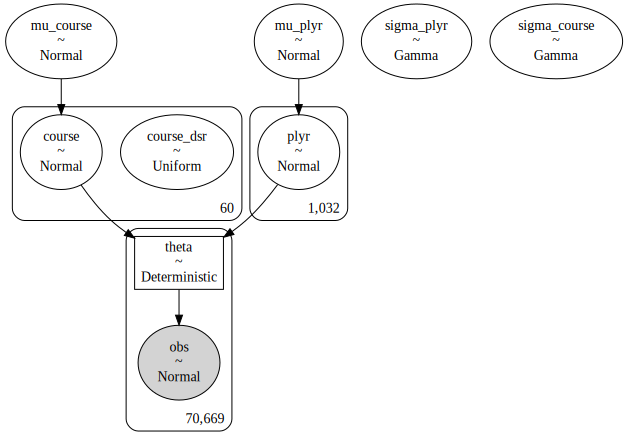

In [5]:
pm.model_to_graphviz(hierarchical_model)

In [6]:
hierarchical_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [7]:
hierarchical_trace.posterior

<xarray.Dataset>
Dimensions:           (chain: 2, draw: 1000, plyr_dim_0: 1032, course_dim_0: 60, course_dsr_dim_0: 60, theta_dim_0: 70669)
Coordinates:
  * chain             (chain) int32 0 1
  * draw              (draw) int32 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * plyr_dim_0        (plyr_dim_0) int32 0 1 2 3 4 ... 1027 1028 1029 1030 1031
  * course_dim_0      (course_dim_0) int32 0 1 2 3 4 5 6 ... 54 55 56 57 58 59
  * course_dsr_dim_0  (course_dsr_dim_0) int32 0 1 2 3 4 5 ... 54 55 56 57 58 59
  * theta_dim_0       (theta_dim_0) int32 0 1 2 3 4 ... 70665 70666 70667 70668
Data variables:
    mu_plyr           (chain, draw) float64 -0.2552 -0.1483 ... 0.2004 0.3022
    plyr              (chain, draw, plyr_dim_0) float64 0.3292 ... 0.4029
    mu_course         (chain, draw) float64 -0.4328 -0.134 ... -0.1078 -0.2124
    course            (chain, draw, course_dim_0) float64 -0.4469 ... -0.6484
    sigma_plyr        (chain, draw) float64 1.397 1.573 1.165 ... 1.777 0.6291
    sigma_course      (chain, draw) float64 1.915 1.573 1.534 ... 1.993 1.57
    course_dsr        (chain, draw, course_dsr_dim_0) float64 0.1174 ... 1.074
    theta             (chain, draw, theta_dim_0) float64 0.05874 ... 0.1805
Attributes:
    created_at:                 2022-09-11T21:30:01.139278
    arviz_version:              0.11.0
    inference_library:          pymc3
    inference_library_version:  3.10.0
    sampling_time:              892.6538183689117
    tuning_steps:               1000

# DSR

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [course_dsr, course, sigma_course, mu_course, plyr, sigma_plyr, mu_plyr]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2208 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC23563F48>,
      dtype=object)

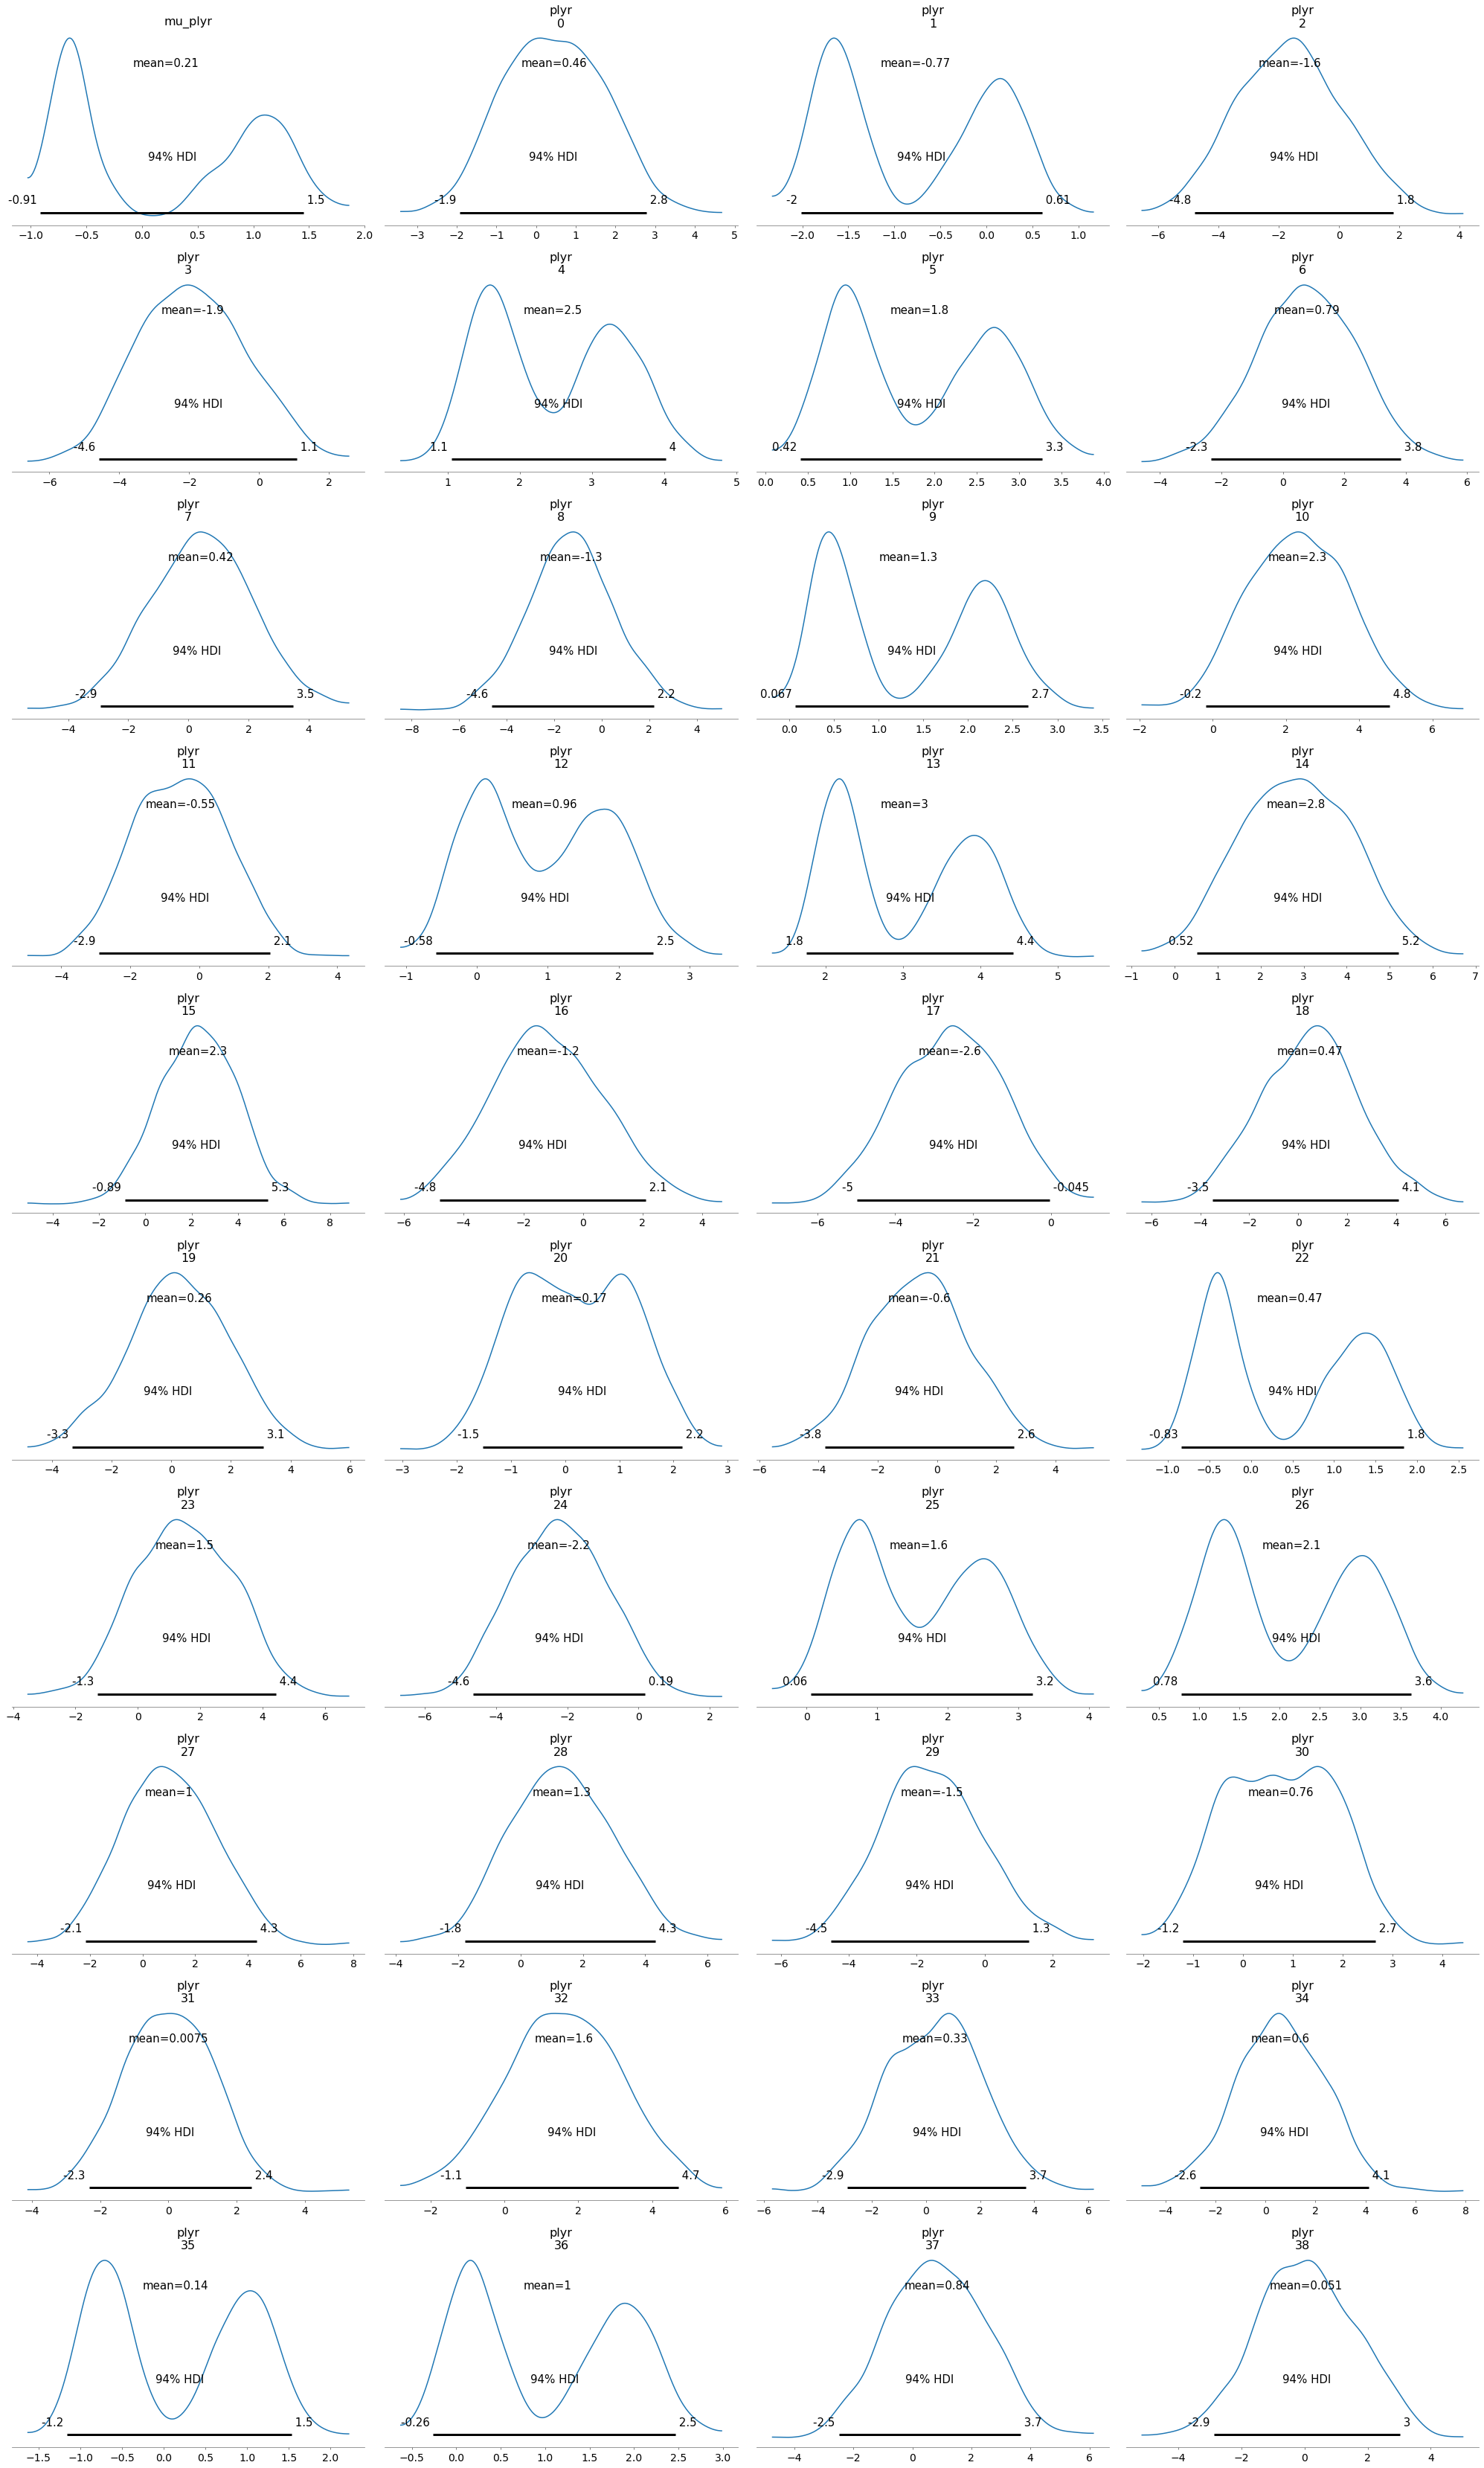

In [8]:

with pm.Model() as dsr_hierarchical_model:
    mu_plyr = pm.Normal('mu_plyr', 0.00, 1.0)
    sigma_plyr  = pm.Gamma('sigma_plyr',3.0,2.5)
    plyr = pm.Normal('plyr', mu_plyr,2, shape = P )
    
    mu_course = pm.Normal('mu_course', 0.0, 1.0)
    sigma_course  = pm.Gamma('sigma_course',3.0,1.5)
    course = pm.Normal('course', mu_course,2, shape = C )
    
    #mu_course_dsr = pm.Normal('mu_course_dsr', 1.0, 0.0001)
    #sigma_course_dsr  = pm.Gamma('sigma_course_dsr',1,2)
    #course_dsr = pm.Uniform('course_dsr', mu_course,sigma_course, shape = C )
    course_dsr = pm.Uniform('course_dsr', 0.0001,3.0, shape = C )
            
    #noise = pm.Gamma('noise',2,1)
    
    theta = pm.Deterministic('theta', course_dsr[dataframe["c_idx"]]*plyr[dataframe["p_idx"]] + course[dataframe["c_idx"]])
    
    
    #obs = pm.Normal('obs',theta, noise, observed = dataframe[measure_var])
    obs = pm.Normal('obs',theta,  observed = dataframe[measure_var])
    
    dsr_hierarchical_trace = pm.sample(return_inferencedata = True,
                                  target_accept = 0.995)
    

az.plot_posterior(dsr_hierarchical_trace)


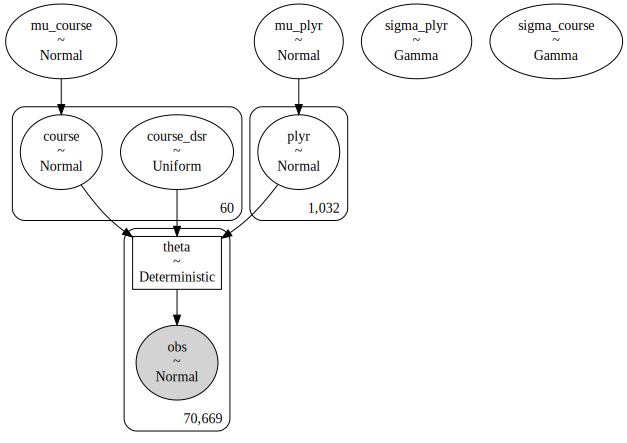

In [9]:
pm.model_to_graphviz(dsr_hierarchical_model)

In [10]:
np.mean(dsr_hierarchical_trace.posterior.plyr.to_numpy().mean(axis = 1).mean(axis = 0))

0.21382782178423915

In [11]:
dsr_hierarchical_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
dsr_hierarchical_trace.posterior

<xarray.Dataset>
Dimensions:           (chain: 2, draw: 1000, plyr_dim_0: 1032, course_dim_0: 60, course_dsr_dim_0: 60, theta_dim_0: 70669)
Coordinates:
  * chain             (chain) int32 0 1
  * draw              (draw) int32 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * plyr_dim_0        (plyr_dim_0) int32 0 1 2 3 4 ... 1027 1028 1029 1030 1031
  * course_dim_0      (course_dim_0) int32 0 1 2 3 4 5 6 ... 54 55 56 57 58 59
  * course_dsr_dim_0  (course_dsr_dim_0) int32 0 1 2 3 4 5 ... 54 55 56 57 58 59
  * theta_dim_0       (theta_dim_0) int32 0 1 2 3 4 ... 70665 70666 70667 70668
Data variables:
    mu_plyr           (chain, draw) float64 0.8518 0.8081 ... -0.3658 -0.3614
    plyr              (chain, draw, plyr_dim_0) float64 0.5381 ... 0.7202
    mu_course         (chain, draw) float64 -0.5202 -0.5438 ... -0.5425 -0.3433
    course            (chain, draw, course_dim_0) float64 -0.8413 ... -0.2204
    sigma_plyr        (chain, draw) float64 0.1269 4.228 0.1134 ... 0.5149 1.321
    sigma_course      (chain, draw) float64 3.137 0.282 5.933 ... 1.314 6.554
    course_dsr        (chain, draw, course_dsr_dim_0) float64 0.3 ... 0.3987
    theta             (chain, draw, theta_dim_0) float64 -0.3951 ... 0.04675
Attributes:
    created_at:                 2022-09-11T22:09:55.200074
    arviz_version:              0.11.0
    inference_library:          pymc3
    inference_library_version:  3.10.0
    sampling_time:              2208.1958026885986
    tuning_steps:               1000

In [16]:
#pm.save_trace(hierarchical_trace, 'hierarchical_trace.trace') 

In [13]:
az.to_netcdf(dsr_hierarchical_trace, 'dsr_hierarchical_trace.nc')

'dsr_hierarchical_trace.nc'

In [14]:
az.to_netcdf(hierarchical_trace, 'hierarchical_trace.nc')

'hierarchical_trace.nc'

# Checking Results

## NODSR

In [15]:
train_df = pd.read_csv("C:/Users/Luke/OneDrive/Research/sg_data/sg_hole_train.csv")

test_df = pd.read_csv("C:/Users/Luke/OneDrive/Research/sg_data/sg_hole_test.csv")
measure_var = 'SG_drive'

In [16]:
nodsr_p_sg_ests_list = np.average(np.average(np.array(hierarchical_trace.posterior.plyr), axis = 1), axis = 0)
nodsr_c_sg_ests_list = np.average(np.average(np.array(hierarchical_trace.posterior.course), axis = 1), axis = 0)

nodsr_p_sg_ests = pd.DataFrame({'p_idx': np.arange(len(nodsr_p_sg_ests_list)), 'sg_drive_est':nodsr_p_sg_ests_list})
nodsr_c_sg_ests = pd.DataFrame({'c_idx': np.arange(len(nodsr_c_sg_ests_list)), 'sg_drive_est':nodsr_c_sg_ests_list})

In [17]:
dsr_p_sg_ests_list = np.average(np.average(np.array(dsr_hierarchical_trace.posterior.plyr), axis = 1), axis = 0)
dsr_c_sg_ests_list = np.average(np.average(np.array(dsr_hierarchical_trace.posterior.course), axis = 1), axis = 0)
dsr_cd_sg_ests_list = np.average(np.average(np.array(dsr_hierarchical_trace.posterior.course_dsr), axis = 1), axis = 0)


dsr_p_sg_ests = pd.DataFrame({'p_idx': np.arange(len(dsr_p_sg_ests_list)), 'sg_drive_est':dsr_p_sg_ests_list})
dsr_c_sg_ests = pd.DataFrame({'c_idx': np.arange(len(dsr_c_sg_ests_list)), 'sg_drive_est':dsr_c_sg_ests_list})
dsr_cd_sg_ests = pd.DataFrame({'c_idx': np.arange(len(dsr_cd_sg_ests_list)), 'dsr_drive_est':dsr_cd_sg_ests_list})

In [18]:
print('train shape: ', train_df.shape)
train_data_w_ests = pd.merge(train_df, nodsr_p_sg_ests, on = 'p_idx', suffixes = ['','_nodsr_plyr'])
print('train shape: ', train_data_w_ests.shape)
train_data_w_ests = pd.merge(train_data_w_ests, nodsr_c_sg_ests, on = 'c_idx', suffixes = ['','_nodsr_course'])

print('train shape: ', train_data_w_ests.shape)
train_data_w_ests = pd.merge(train_data_w_ests, dsr_p_sg_ests, on = 'p_idx', suffixes = ['','_dsr_plyr'])
print('train shape: ', train_data_w_ests.shape)
train_data_w_ests = pd.merge(train_data_w_ests, dsr_c_sg_ests, on = 'c_idx', suffixes = ['','_dsr_course'])
train_data_w_ests = pd.merge(train_data_w_ests, dsr_cd_sg_ests, on = 'c_idx', suffixes = ['','_dsr_course'])

train shape:  (70669, 28)
train shape:  (70669, 29)
train shape:  (70669, 30)
train shape:  (70669, 31)


In [19]:
train_data_w_ests['nodsr_sg_drive_est'] = train_data_w_ests['sg_drive_est'] + train_data_w_ests['sg_drive_est_nodsr_course']
train_data_w_ests['dsr_sg_drive_est'] = train_data_w_ests['sg_drive_est_dsr_plyr']*train_data_w_ests['dsr_drive_est'] + train_data_w_ests['sg_drive_est_dsr_course']


In [20]:
print('test shape: ', test_df.shape)
test_data_w_ests = pd.merge(test_df, nodsr_p_sg_ests, on = 'p_idx', suffixes = ['','_nodsr_plyr'])
print('test shape: ', test_data_w_ests.shape)
test_data_w_ests = pd.merge(test_data_w_ests, nodsr_c_sg_ests, on = 'c_idx', suffixes = ['','_nodsr_course'])

print('test shape: ', test_data_w_ests.shape)
test_data_w_ests = pd.merge(test_data_w_ests, dsr_p_sg_ests, on = 'p_idx', suffixes = ['','_dsr_plyr'])
print('test shape: ', test_data_w_ests.shape)
test_data_w_ests = pd.merge(test_data_w_ests, dsr_c_sg_ests, on = 'c_idx', suffixes = ['','_dsr_course'])
test_data_w_ests = pd.merge(test_data_w_ests, dsr_cd_sg_ests, on = 'c_idx', suffixes = ['','_dsr_course'])

test shape:  (12952, 28)
test shape:  (12952, 29)
test shape:  (12952, 30)
test shape:  (12952, 31)


In [21]:
test_data_w_ests['nodsr_sg_drive_est'] = test_data_w_ests['sg_drive_est'] + test_data_w_ests['sg_drive_est_nodsr_course']
test_data_w_ests['dsr_sg_drive_est'] = test_data_w_ests['sg_drive_est_dsr_plyr']*test_data_w_ests['dsr_drive_est'] + test_data_w_ests['sg_drive_est_dsr_course']


In [22]:
print('TRAINING DATA')
print('NODSR Drive: ', mean_squared_error(train_data_w_ests['nodsr_sg_drive_est'], train_data_w_ests['SG_drive'], squared = False))
print('DSR Drive: ', mean_squared_error(train_data_w_ests['dsr_sg_drive_est'], train_data_w_ests['SG_drive'], squared = False))
print()
print('TEST DATA')
print('NODSR Drive: ', mean_squared_error(test_data_w_ests['nodsr_sg_drive_est'], test_data_w_ests['SG_drive'], squared = False))
print('DSR Drive: ', mean_squared_error(test_data_w_ests['dsr_sg_drive_est'], test_data_w_ests['SG_drive'], squared = False))
print()

TRAINING DATA
NODSR Drive:  1.1087148049301128
DSR Drive:  1.1110254663920098

TEST DATA
NODSR Drive:  1.4752788399984675
DSR Drive:  1.309363651590731

